In [172]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
import random
from scipy.optimize import curve_fit
from pandas import DataFrame

In [173]:
def monte_carlo_ooip(num_simulations, area, thickness, porosity,water_saturation, formation_volume_factor, recovery_factor):
    
    """
    Perform MCS
    """
    
    ooip_results = []
    rv_results = []
    A_results = []
    h_results = []
    phi_results = []
    Sw_results = []
    B_results = []
    RF_results = []
    
    for x in range(num_simulations):
        if area[0] == 'u': 
            A = np.random.uniform(area[1], area[2])
        elif area[0] == 'n': 
            A = np.random.normal(area[1], area[2])
        else: 
            A = np.random.normal(area[1], area[2])
        
        if thickness[0] == 'u': 
            h = np.random.uniform(thickness[1], thickness[2])
        elif thickness[0] == 'n': 
            h = np.random.normal(thickness[1], thickness[2])
        else: 
            h = np.random.normal(thickness[1], thickness[2])
        
        if porosity[0] == 'u': 
            phi = np.random.uniform(porosity[1], porosity[2])
        elif porosity[0] == 'n': 
            phi = np.random.normal(porosity[1], porosity[2])
        else: 
            phi = np.random.normal(porosity[1], porosity[2]) 
            
        if water_saturation[0] == 'u': 
            Sw = np.random.uniform(water_saturation[1], water_saturation[2])
        elif water_saturation[0] == 'n': 
            Sw = np.random.normal(water_saturation[1], water_saturation[2])
        else: 
            Sw = np.random.normal(water_saturation[1], water_saturation[2])    
            
        if formation_volume_factor[0] == 'u': 
            B = np.random.uniform(formation_volume_factor[1], formation_volume_factor[2])
        elif formation_volume_factor[0] == 'n': 
            B = np.random.normal(formation_volume_factor[1], formation_volume_factor[2])
        else: 
            B = np.random.normal(formation_volume_factor[1], formation_volume_factor[2])
        
        if recovery_factor[0] == 'u': 
            RF = np.random.uniform(recovery_factor[1], recovery_factor[2])
        elif recovery_factor[1] == 'n': 
            RF = np.random.normal(recovery_factor[1], recovery_factor[2])
        else: 
            RF = np.random.normal(recovery_factor[1], recovery_factor[2])
               
        OOIP = (A * h * phi * (1 - Sw)) / B
        RV = OOIP * RF
        ooip_results.append(OOIP)
        rv_results.append(RV)
        A_results.append(A)
        h_results.append(h)
        phi_results.append(phi)
        Sw_results.append(Sw)
        B_results.append(B)
        RF_results.append(RF)
    
    return ooip_results, rv_results, A_results, h_results, phi_results, Sw_results, B_results, RF_results

In [174]:
"""
Input format:
if distribution = normal --> 'n', mean, sigma
if distribution = uniform --> 'u', min, max
"""
num_simulations = 2000
area = ('u', 100, 500)  # m3
thickness = ('n', 100, 10)  # m3
porosity = ('n', 0.2, 0.05)  # fraction
water_saturation = ('n', 0.3, 0.07)  # fraction
formation_volume_factor = ('u', 1.1, 1.2) # m3/std.m3
recovery_factor = ('n', 0.3, 0.05)

ooip, rv, A, h, phi, Sw, B, RF = monte_carlo_ooip(num_simulations, area, thickness,
                                  porosity, water_saturation,
                                  formation_volume_factor, recovery_factor)


print("Average Original Oil in Place (OOIP):", np.mean(ooip), "std. m3")
print("Average Recoverable Volume:", np.mean(rv), "std. m3")


Average Original Oil in Place (OOIP): 3678.8431562667124 std. m3
Average Recoverable Volume: 1113.5638019847643 std. m3


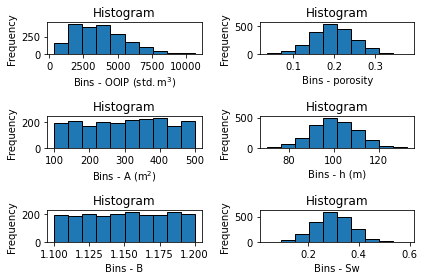

In [180]:
# Create histograms
fig, ax = plt.subplots(3, 2)

ax[0, 0].hist(ooip, bins=10, edgecolor='black')
ax[0, 0].set_xlabel('Bins - OOIP ($\mathregular{std. m^{3}}$)')
ax[0, 0].set_title('Histogram')
ax[0, 0].set_ylabel('Frequency')

ax[0, 1].hist(phi, bins=10, edgecolor='black')
ax[0, 1].set_xlabel('Bins - porosity')
ax[0, 1].set_title('Histogram')
ax[0, 1].set_ylabel('Frequency')

ax[1, 0].hist(A, bins=10, edgecolor='black')
ax[1, 0].set_xlabel('Bins - A ($\mathregular{m^{2}}$)')
ax[1, 0].set_title('Histogram')
ax[1, 0].set_ylabel('Frequency')

ax[1, 1].hist(h, bins=10, edgecolor='black')
ax[1, 1].set_xlabel('Bins - h (m)')
ax[1, 1].set_title('Histogram')
ax[1, 1].set_ylabel('Frequency')

ax[2, 0].hist(B, bins=10, edgecolor='black')
ax[2, 0].set_xlabel('Bins - B')
ax[2, 0].set_title('Histogram')
ax[2, 0].set_ylabel('Frequency')

ax[2, 1].hist(Sw, bins=10, edgecolor='black')
ax[2, 1].set_xlabel('Bins - Sw')
ax[2, 1].set_title('Histogram')
ax[2, 1].set_ylabel('Frequency')

fig.tight_layout()
plt.show()

In [181]:
df = pd.DataFrame({'A' : A, 'h' : h, 'φ' : φ, 'Sw' : Sw, 'B' : B, 'RF' : RF})
df.to_excel("output.xlsx",sheet_name='MCS')

In [182]:
def tornado_chart(data_left, data_right, labels, title):
    
    """
    Create a Tornado Chart
    """
    
    fig, ax = plt.subplots()
    y_pos = range(len(data_left))  # Positions for the bars on the y-axis

    # Plot the left-side bars (negative values)
    ax.barh(y_pos, data_left, align='center', color='blue', alpha=0.8, label='Negative')

    # Plot the right-side bars (postive values)
    ax.barh(y_pos, data_right, align='center', color='red', alpha=0.8, label='Positive')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Values')
    ax.set_title(title)
    ax.legend()
    plt.show()

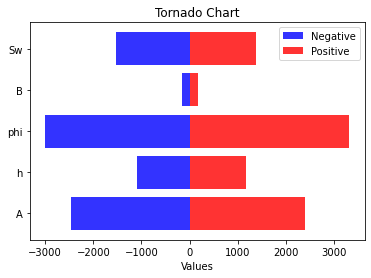

In [183]:
# Create the Tornado Chart

# Calculate mean scenario
mean_scenario = (np.mean(A) * np.mean(h) * np.mean(phi) * (1 - np.mean(Sw))) / np.mean(B)

# Calculate the negative values
A_left =  (np.min(A) * np.mean(h) * np.mean(phi) * (1 - np.mean(Sw))) / np.mean(B) - mean_scenario
h_left = (np.mean(A) * np.min(h) * np.mean(phi) * (1 - np.mean(Sw))) / np.mean(B) - mean_scenario
phi_left = (np.mean(A) * np.mean(h) * np.min(phi) * (1 - np.mean(Sw))) / np.mean(B) - mean_scenario
B_left = (np.mean(A) * np.mean(h) * np.mean(phi) * (1 - np.mean(Sw))) / np.max(B) - mean_scenario
Sw_left = (np.mean(A) * np.mean(h) * np.mean(phi) * (1 - np.max(Sw))) / np.mean(B) - mean_scenario                        

# Calculate the positive values
A_right =  (np.max(A) * np.mean(h) * np.mean(phi) * (1 - np.mean(Sw))) / np.mean(B) - mean_scenario
h_right = (np.mean(A) * np.max(h) * np.mean(phi) * (1 - np.mean(Sw))) / np.mean(B) - mean_scenario
phi_right = (np.mean(A) * np.mean(h) * np.max(phi) * (1 - np.mean(Sw))) / np.mean(B) - mean_scenario
B_right = (np.mean(A) * np.mean(h) * np.mean(phi) * (1 - np.mean(Sw))) / np.min(B) - mean_scenario
Sw_right = (np.mean(A) * np.mean(h) * np.mean(phi) * (1 - np.min(Sw))) / np.mean(B) - mean_scenario   

data_left = [A_left, h_left, phi_left, B_left, Sw_left]
data_right = [A_right, h_right, phi_right, B_right, Sw_right]
labels = ['A', 'h', 'phi', 'B', 'Sw']

tornado_chart(data_left, data_right, labels, 'Tornado Chart')